# Credit Default Prediction
**Business Understanding:**

    In this project, we will build a model to predict whether a given customer defaults or not. Credit default is one of the most important problems in the banking and risk analytics industry. There are various attributes which can be used to predict default, such as demographic data (age, income, employment status, etc.), (credit) behavioural data (past loans, payment, number of times a credit payment has been delayed by the customer etc.).

We'll start the process with data cleaning and preparation and then tune the model to find optimal hyperparameters.



# Data Understanding and Cleaning

In [1]:
import logging

logger = logging.getLogger()

file_handler = logging.FileHandler(filename='project_log.log', mode='w')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

logger.setLevel(logging.DEBUG)
logger.info('PROJECT FILE STARTS RUNNING!')

In [2]:
logger.info('Importing Libraries')

In [3]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve

import pickle

import warnings
warnings.filterwarnings('ignore')

logger.info('LIBRARIES IMPORTED')

In [4]:
# Reading the csv file and putting it into 'CC_DF' object.
CC_DF = pd.read_csv(r"C:\Users\vacha\Downloads\Credit-Card-Default-master\Credit-Card-Default-master\credit-card-default.csv")
CC_DF.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
logger.info('DATA IMPORTED AND SAVING INTO PANDAS DATAFRAME!')

# EDA

In [6]:
logger.info('EDA STARTED')

In [7]:
print('Number of Columns - ',len(CC_DF.columns))
print('Names of columns - ',CC_DF.columns)

Number of Columns -  25
Names of columns -  Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'defaulted'],
      dtype='object')


There are 25(including ID) variables:

    ID: ID of each client
    LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
    SEX: Gender (1=male, 2=female)
    EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
    MARRIAGE: Marital status (1=married, 2=single, 3=others)
    AGE: Age in years
    PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
    PAY_2: Repayment status in August, 2005 (scale same as above)
    PAY_3: Repayment status in July, 2005 (scale same as above)
    PAY_4: Repayment status in June, 2005 (scale same as above)
    PAY_5: Repayment status in May, 2005 (scale same as above)
    PAY_6: Repayment status in April, 2005 (scale same as above)
    BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
    BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
    BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
    BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
    BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
    BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
    PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
    PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
    PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
    PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
    PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
    PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
    defaulted: Default payment (1=yes, 0=no)

In [8]:
# ID is a uniqe and diffrent for customer to customr, So dropping it
CC_DF.drop('ID',axis=1,inplace=True)

In [9]:
# Lets see the basic information of the data
CC_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

- All the 24 column contains numbers with dat type int
- There are 30000 customer data
- There 0 missing values in data

<function matplotlib.pyplot.show(close=None, block=None)>

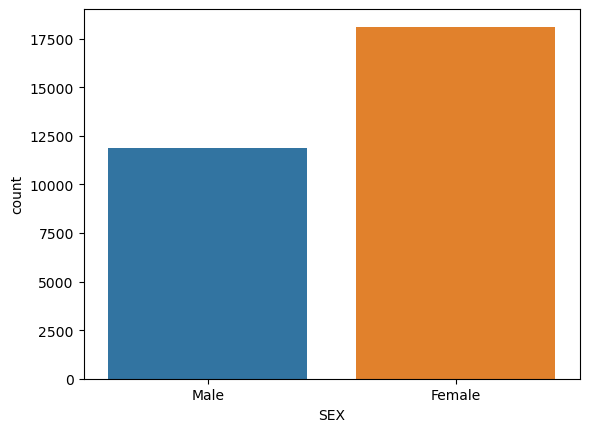

In [10]:
sns.countplot(x=CC_DF['SEX'])
plt.xticks(ticks=[0,1],labels=['Male','Female'])
plt.show

    Compare to Male Female Credit card users are more

<function matplotlib.pyplot.show(close=None, block=None)>

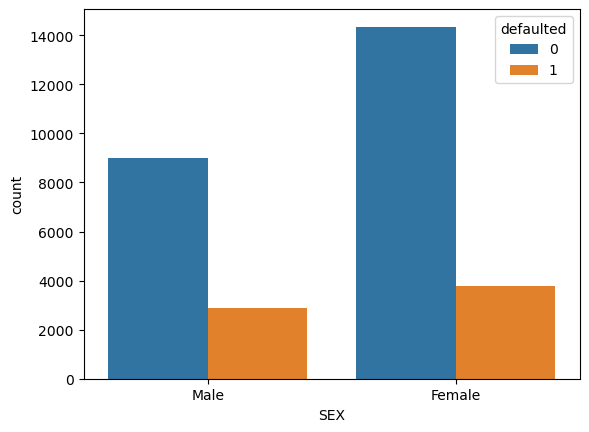

In [11]:
sns.countplot(x=CC_DF['SEX'],hue=CC_DF['defaulted'])
plt.xticks(ticks=[0,1],labels=['Male','Female'])
plt.show

    Female are holding more credit cards than male but the default is low compare to the male defaulters. Male are holding less number of card compare to female but the defaulters rate is high

In [12]:
#MARRIAGE: Marital status (1=married, 2=single, 3=others)
CC_DF['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [13]:
# As the marriage status will be married or not and there are 323+54 data which is coming under other, I will convert them to singal(2)
CC_DF['MARRIAGE']=CC_DF['MARRIAGE'].apply(lambda x : 2 if x >2 or x < 1 else x)

In [14]:
CC_DF['MARRIAGE'].value_counts()

2    16341
1    13659
Name: MARRIAGE, dtype: int64

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

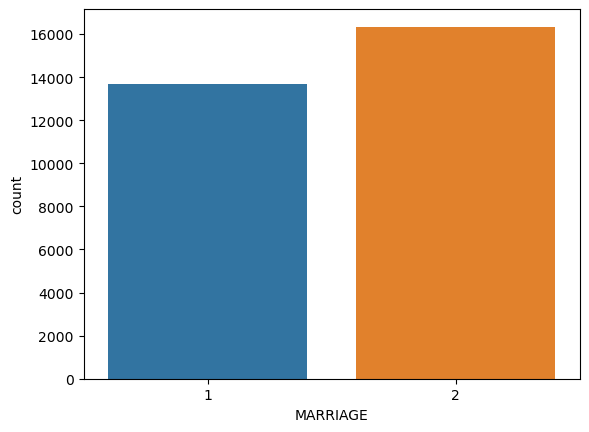

In [15]:
sns.countplot(x=CC_DF['MARRIAGE'])

Now both are almost equal

In [16]:
#EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
CC_DF['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [17]:
# As 5,6,0 are unknown I am considering under others
CC_DF['EDUCATION']=CC_DF['EDUCATION'].apply(lambda x : 4 if x >4 or x < 1 else x)
CC_DF['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

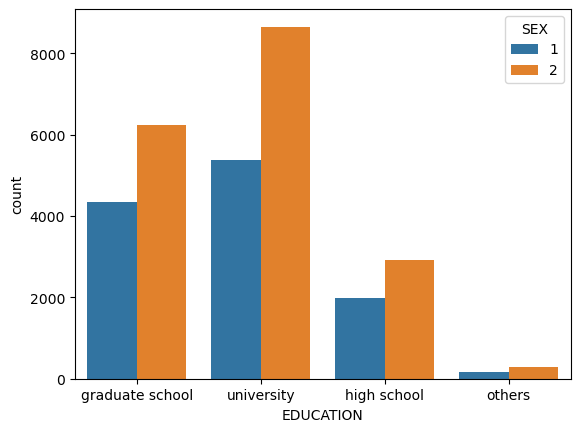

In [18]:
sns.countplot(x=CC_DF['EDUCATION'],hue=CC_DF['SEX'])
plt.xticks(ticks=[0,1,2,3],labels=['graduate school','university','high school','others'])
plt.show

From the above we can stand Females are more educated than males

# Handling Outliers

In [19]:
logger.info('HANDALING OUTLIERS STARTS!')

In [20]:
CC_DF.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Limit Balance Column

skewness -  0.992866960519544


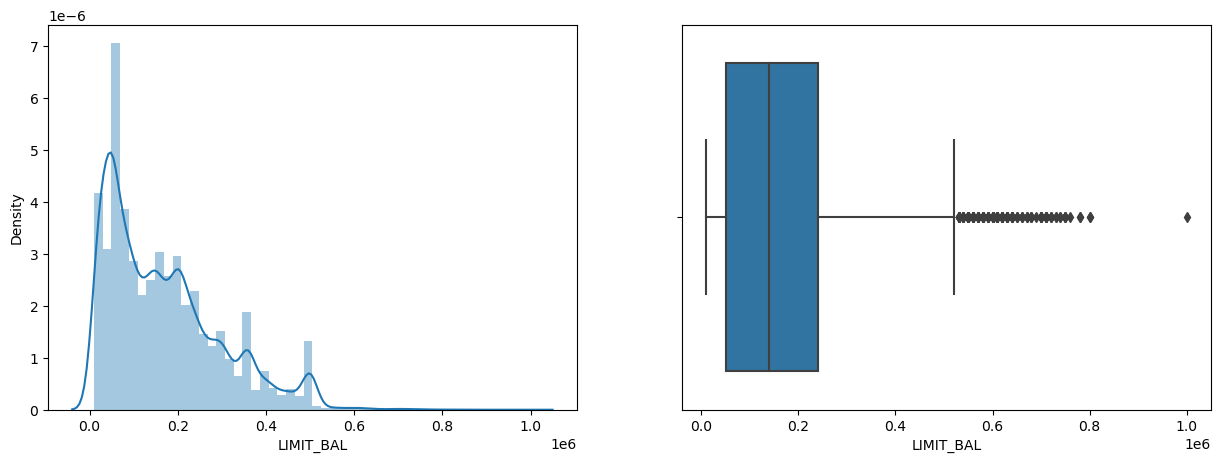

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)

plt.subplot(1,2,1)
sns.distplot(CC_DF['LIMIT_BAL'])

plt.subplot(1,2,2)
sns.boxplot(CC_DF['LIMIT_BAL'])

plt.show

print('skewness - ',CC_DF['LIMIT_BAL'].skew())

# Observations
    > Limit balance column is skewed to the left and skewmess is near to 1
    > In box plot we can see there are outliers to be handeled
    > We will handel the outliers by using quantiles due to the skewed data
    > As we apply quantiles we loss big number of data, so instant of removing outliers i will capp them at upper_limit

In [22]:
percentile25=CC_DF['LIMIT_BAL'].quantile(0.25) # Calculating 25th Quantile
percentile75=CC_DF['LIMIT_BAL'].quantile(0.75) # Calculating 75th Quantile
iqr=percentile75-percentile25 # Finding Inter Quantile Range
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('25th percentile - ',percentile25,'75th percentile - ',percentile75)
print('Upper Limit - ',upper_limit,'Lower Limit - ',lower_limit)

25th percentile -  50000.0 75th percentile -  240000.0
Upper Limit -  525000.0 Lower Limit -  -235000.0


In [23]:
CC_DF['LIMIT_BAL'] = np.where(CC_DF['LIMIT_BAL'] > upper_limit, upper_limit,
                 np.where(CC_DF['LIMIT_BAL'] < lower_limit, lower_limit,CC_DF['LIMIT_BAL']))

<function matplotlib.pyplot.show(close=None, block=None)>

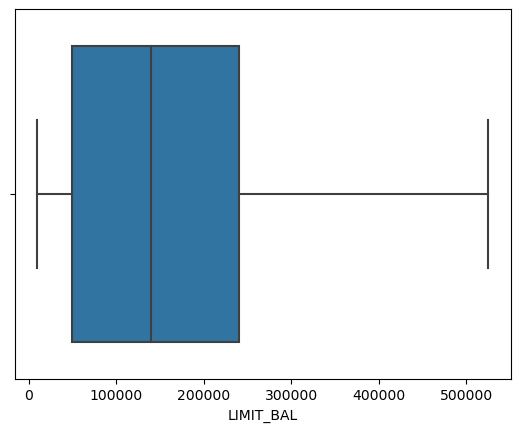

In [24]:
# Ploting box Plot After Outlier capping
sns.boxplot(CC_DF['LIMIT_BAL'])
plt.show

All Outliers are capped according to the limits

# Age Column

skewness -  0.7322458687830562


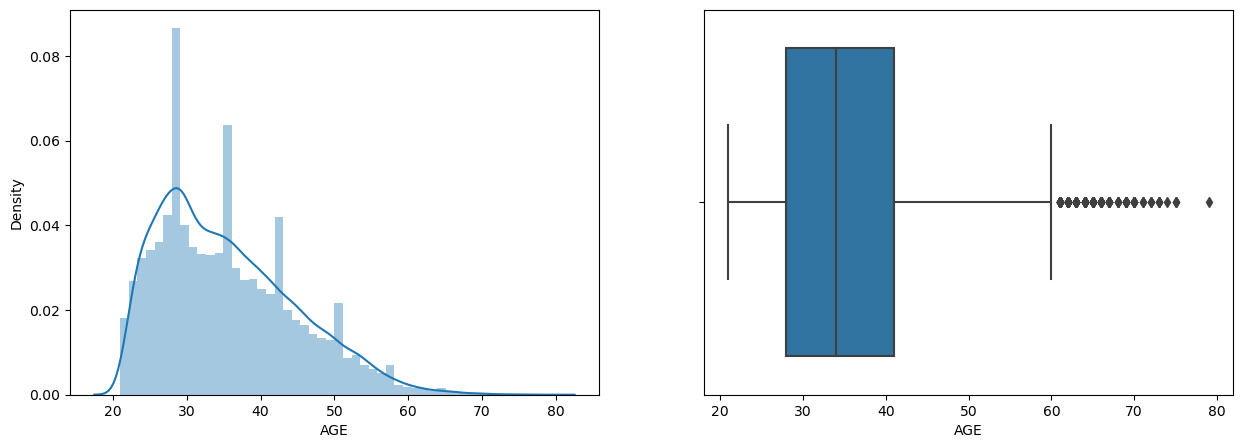

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)

plt.subplot(1,2,1)
sns.distplot(CC_DF['AGE'])

plt.subplot(1,2,2)
sns.boxplot(CC_DF['AGE'])

plt.show

print('skewness - ',CC_DF['AGE'].skew())

# OBSERVATIONS :
    > Age column is skewed to the left.
    > In box plot we can see there are outliers to be handeled.
    > We will handel the outliers by using quantiles due to the skewed data.

    > As we apply quantiles we loss big number of data, So instant of removeing outliers I will capp them at upper_limit

In [26]:
percentile25=CC_DF['AGE'].quantile(0.25) # Calculating 25th Quantile
percentile75=CC_DF['AGE'].quantile(0.75) # Calculating 75th Quantile
iqr=percentile75-percentile25 # Finding Inter Quantile Range
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('25th percentile - ',percentile25,'75th percentile - ',percentile75)
print('Upper Limit - ',upper_limit,'Lower Limit - ',lower_limit)

25th percentile -  28.0 75th percentile -  41.0
Upper Limit -  60.5 Lower Limit -  8.5


In [27]:
CC_DF['AGE'] = np.where(CC_DF['AGE'] > upper_limit, upper_limit,
                 np.where(CC_DF['AGE'] < lower_limit, lower_limit,CC_DF['AGE']))


<function matplotlib.pyplot.show(close=None, block=None)>

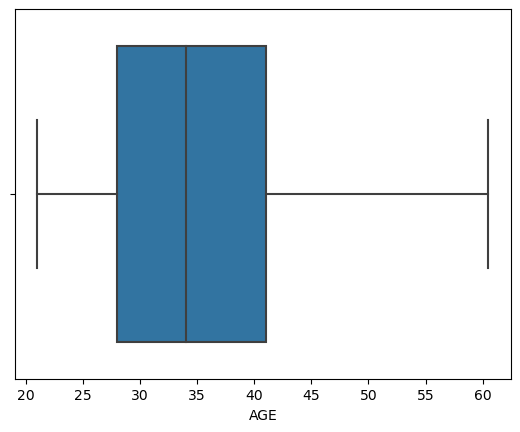

In [28]:
# Ploting box Plot After Outlier capping
sns.boxplot(CC_DF['AGE'])
plt.show

In [29]:
CC_DF['LIMIT_BAL']

0         20000.0
1        120000.0
2         90000.0
3         50000.0
4         50000.0
           ...   
29995    220000.0
29996    150000.0
29997     30000.0
29998     80000.0
29999     50000.0
Name: LIMIT_BAL, Length: 30000, dtype: float64

skewness -  0.9045039681490943


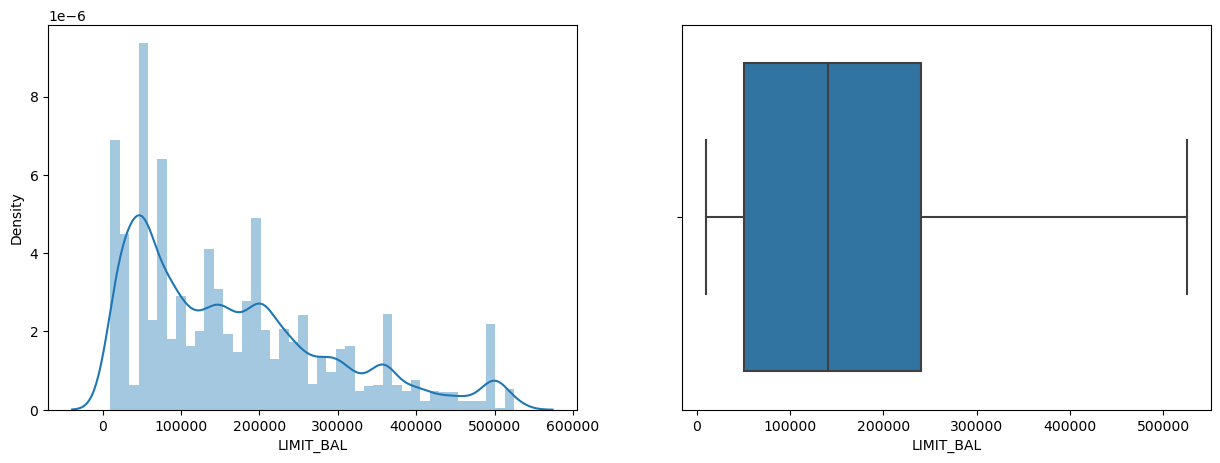

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)

plt.subplot(1,2,1)
sns.distplot(CC_DF['LIMIT_BAL'])

plt.subplot(1,2,2)
sns.boxplot(CC_DF['LIMIT_BAL'])

plt.show

print('skewness - ',CC_DF['LIMIT_BAL'].skew())

In [31]:
logger.info('HANDALING OUTLIERS ENDS!')

<function matplotlib.pyplot.show(close=None, block=None)>

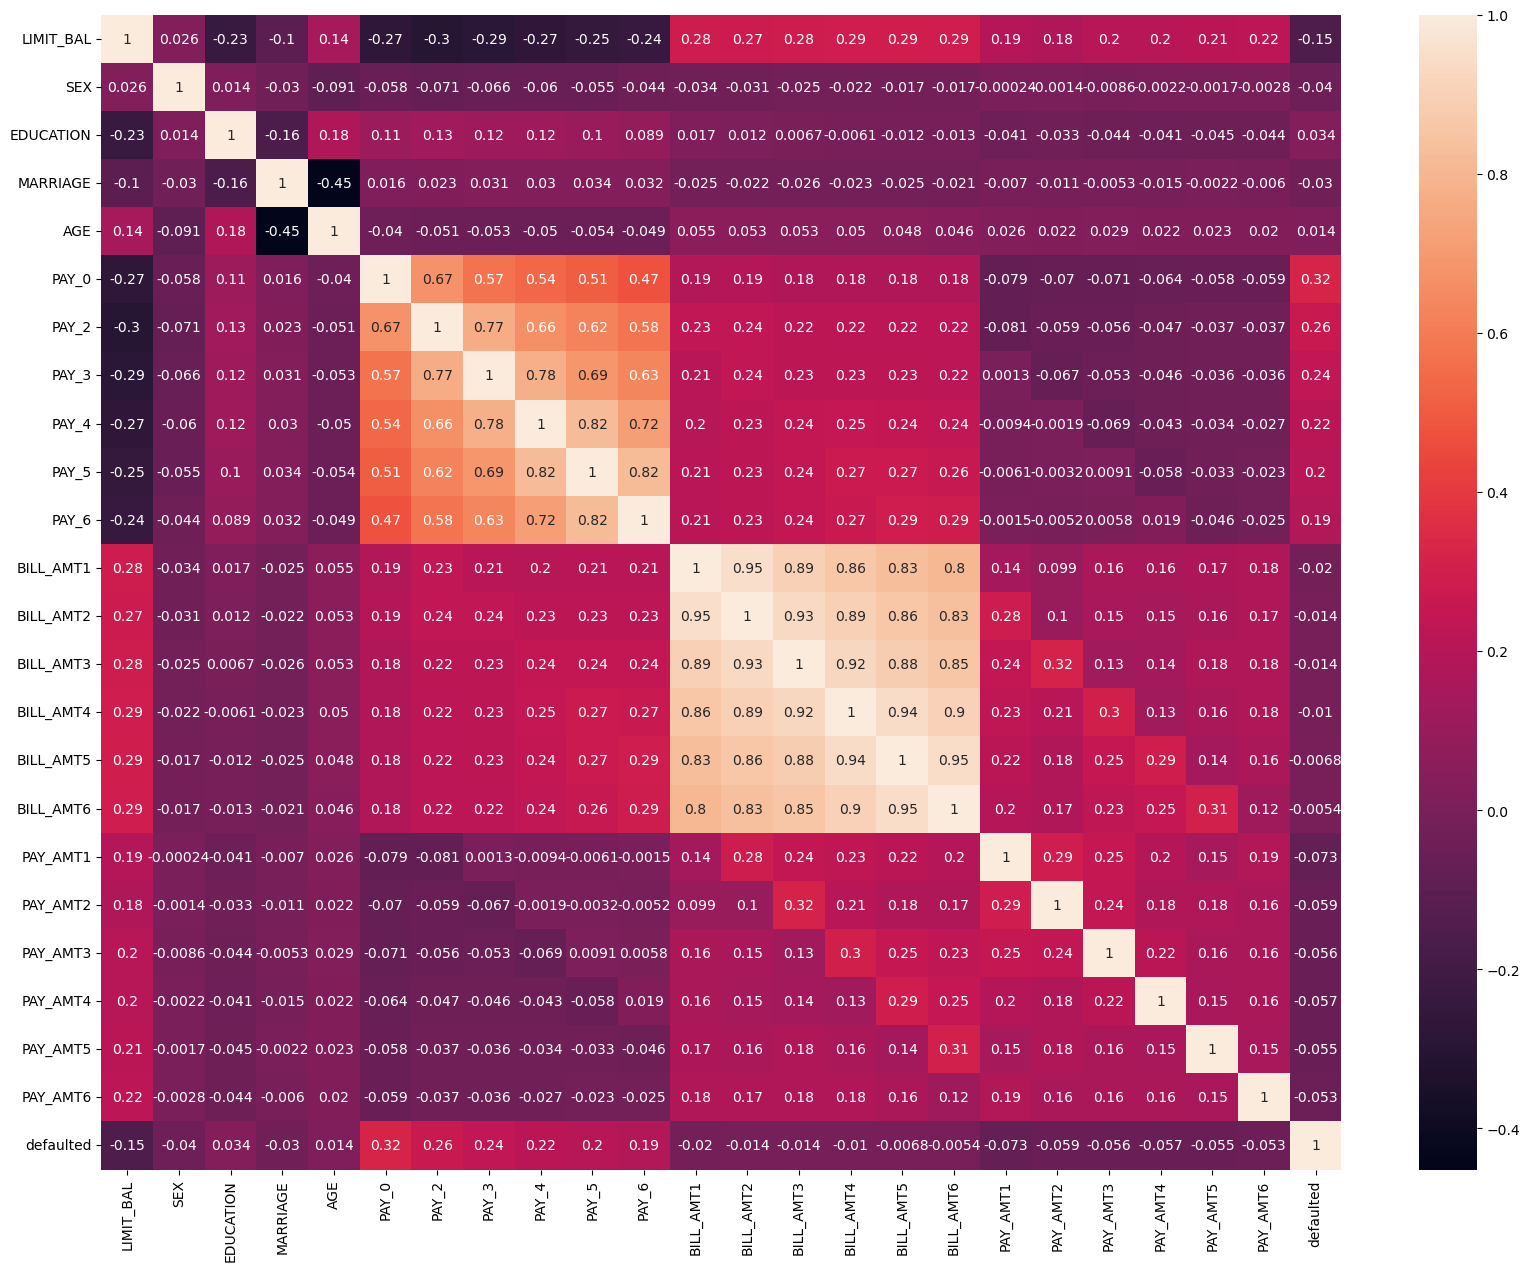

In [32]:
plt.figure(figsize=(20,15))
sns.heatmap(CC_DF.corr(),annot=True)
plt.show

In [33]:
logger.info('EDA ENDS!')

# Handeling Imbalnced Data

In [34]:
logger.info('HANDALING IMBALENCED DATA STARTS!')

In [35]:
print('Non Defaulter count - ',CC_DF['defaulted'].value_counts()[0])
print('Non Defaulter Precent - ',((CC_DF['defaulted'].value_counts()[0])/len(CC_DF))*100,' %')
print('Defaulter count - ',CC_DF['defaulted'].value_counts()[1])
print('Defaulter Precent - ',((CC_DF['defaulted'].value_counts()[1])/len(CC_DF))*100,' %')


Non Defaulter count -  23364
Non Defaulter Precent -  77.88000000000001  %
Defaulter count -  6636
Defaulter Precent -  22.12  %


<AxesSubplot:xlabel='defaulted', ylabel='count'>

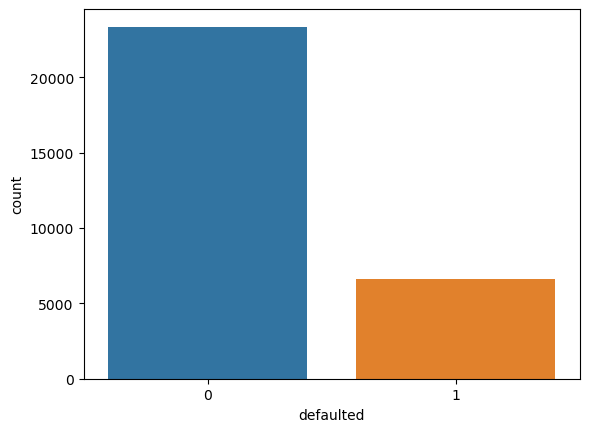

In [36]:
sns.countplot(x=CC_DF['defaulted'])

    > We can see it is an imbalance data set with 22% Defaulters and 78% Non-Defaulters
    > To handle this we have to use Under or Over Sampling

# Over Sampling

In [37]:
logger.info('HANDALING IMBALENCED DATA - OVER SAMPLEING STARTS!')

In [38]:
# Initialise SMOTE object
smote = SMOTE()

In [39]:
# Separate independent and dependent variables
X = CC_DF.drop('defaulted',axis=1)
y = CC_DF['defaulted']

In [40]:
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

In [41]:
# Combine balanced X and y
CC_DF_final = pd.DataFrame(x_smote, columns=CC_DF.columns[:-1])
CC_DF_final['default'] = y_smote

CC_DF_final.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24.0,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000.0,2,2,2,26.0,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000.0,2,2,2,34.0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000.0,2,2,1,37.0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000.0,1,2,1,57.0,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [42]:
logger.info('HANDALING IMBALENCED DATA - OVER SAMPLEING ENDS!')

<AxesSubplot:xlabel='default', ylabel='count'>

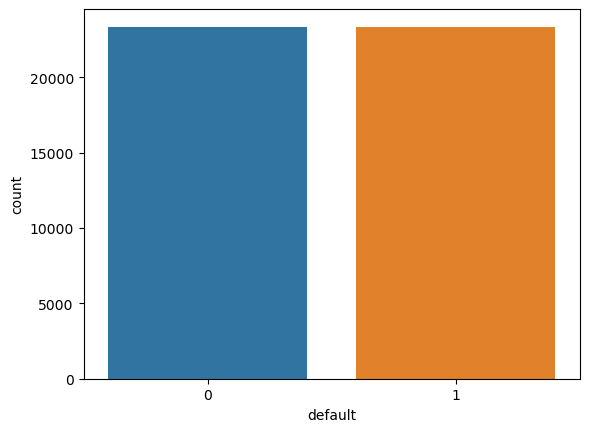

In [43]:
sns.countplot(x=CC_DF_final['default'])

Now dataset is balanced

In [44]:
logger.info('HANDALING IMBALENCED DATA ENDS!')

> After balancing the data here we find that the data that both defaulter and non defaulter are of same count 

In [45]:
CC_DF_final.to_csv('Final_data.csv',index = True)

In [46]:
data1 = pd.read_csv('Final_data.csv')

In [47]:
data1

,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,0,20000.000000,2,2,1,24.000000,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,1,120000.000000,2,2,2,26.000000,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,90000.000000,2,2,2,34.000000,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,50000.000000,2,2,1,37.000000,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,50000.000000,1,2,1,57.000000,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,46723,80000.000000,1,1,1,35.945412,2,1,1,2,...,41087,40597,42101,3308,1429,2746,476,2238,2046,1
46724,46724,200000.000000,1,1,1,42.667513,-1,-1,-1,-1,...,480,2517,0,290,79,480,2517,0,228,1
46725,46725,120000.000000,1,2,2,30.443648,1,-2,-2,-2,...,-1946,-1946,-1946,2,0,0,0,0,0,1
46726,46726,194668.588007,1,2,1,33.132565,6,5,4,3,...,209623,203659,193689,0,153,0,0,75986,4899,1
